# Implement linear regression using gradient descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess_data(filepath):
    # Load dataset and drop rows with NA values
    Auto = pd.read_csv(filepath, na_values='?', dtype={'ID': str}).dropna().reset_index()

    # Extract relevant data features for X, and the target variable for Y
    X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values
    Y = Auto[['mpg']].values

    # Normalize the features by subtracting the mean and dividing by the standard deviation
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    return X_normalized, Y

# Define other functions needed for the linear regression model
def initialize_parameters(n_features):
    """Initialize weights and bias for linear regression model
    Args:
        n_features: Number of input features
    Returns:
        w: Initialized weights
        b: Initialized bias
    """
    w = np.zeros((n_features, 1))
    b = 0
    return w, b

def model_forward(X, w, b):
    """Perform forward propagation to compute predicted output
    Args:
        X: Input features
        w: Weights of the model
        b: Bias of the model
    Returns:
        z: Predicted output
    """
    z = np.dot(X, w) + b
    return z

def compute_cost(Y, z):
    """Compute cost function using mean squared error
    Args:
        Y: True labels
        z: Predicted output
    Returns:
        cost: Computed cost
    """
    n_samples = len(Y)
    cost = (1/(2*n_samples)) * np.sum((Y - z)**2)
    return cost

def model_backward(X, Y, z):
    """Perform backward propagation to compute gradients of parameters
    Args:
        X: Input features
        Y: True labels
        z: Predicted output
    Returns:
        dw: Gradient of weights
        db: Gradient of bias
    """
    n_samples = len(Y)
    dz = (1/n_samples) * (z - Y)
    dw = np.dot(X.T, dz)
    db = np.sum(dz)
    return dw, db

def update_parameters(w, b, dw, db, learning_rate):
    """Update parameters using gradient descent
    Args:
        w: Current weights
        b: Current bias
        dw: Gradient of weights
        db: Gradient of bias
        learning_rate: Learning rate for gradient descent
    Returns:
        w: Updated weights
        b: Updated bias
    """
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

def predict(X, w, b):
    return model_forward(X, w, b)

def train_linear_model(X_train, Y_train, n_iterations, learning_rate):
    """Train linear regression model using gradient descent
    Args:
        X_train: Training features
        Y_train: Training labels
        n_iterations: Number of iterations for gradient descent
        learning_rate: Learning rate for gradient descent
    Returns:
        w: Trained weights
        b: Trained bias
        costs: List of costs during optimization
    """
    n_features = X_train.shape[1]
    w, b = initialize_parameters(n_features)
    costs = []

    for i in range(n_iterations):
        # Forward propagation
        z = model_forward(X_train, w, b)
        
        # Compute cost
        cost = compute_cost(Y_train, z)
        costs.append(cost)
        
        # Backward propagation
        dw, db = model_backward(X_train, Y_train, z)
        
        # Update parameters
        w, b = update_parameters(w, b, dw, db, learning_rate)
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b, costs

# Load and preprocess data
X, Y = load_and_preprocess_data("Auto.csv")



# Model Evaluation

Iteration 0: Cost 310.0148
Iteration 100: Cost 43.4036
Iteration 200: Cost 11.0605
Iteration 300: Cost 6.6629
Iteration 400: Cost 6.0060
Iteration 500: Cost 5.8657
Iteration 600: Cost 5.8048
Iteration 700: Cost 5.7618
Iteration 800: Cost 5.7268
Iteration 900: Cost 5.6975
Evaluation for the model with all features:
RMSE: 3.4075
R²: 0.7725


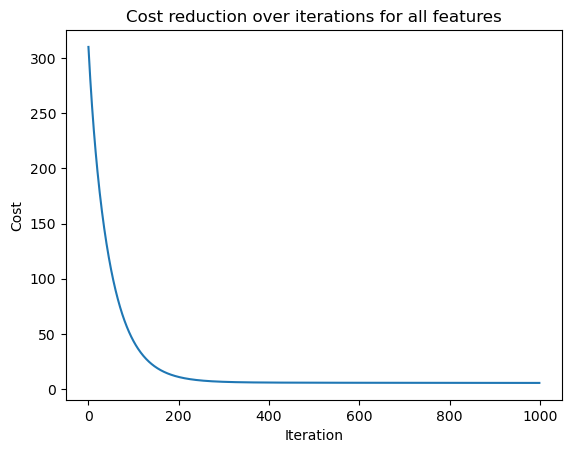

In [2]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define training parameters
n_iterations = 1000
learning_rate = 0.01

# Train the linear model with all features
w_all, b_all, costs_all = train_linear_model(X_train, y_train, n_iterations, learning_rate)

# Predict the output for test data
y_pred_all = predict(X_test, w_all, b_all)

# Evaluate the model with all features
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)

print("Evaluation for the model with all features:")
print(f"RMSE: {rmse_all:.4f}")
print(f"R²: {r2_all:.4f}")

# Plotting cost reduction over iterations for the model with all features
plt.plot(costs_all)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations for all features')
plt.show()



Iteration 0: Cost 305.2369
Iteration 100: Cost 51.2634
Iteration 200: Cost 17.2361
Iteration 300: Cost 12.6771
Iteration 400: Cost 12.0663
Iteration 500: Cost 11.9845
Iteration 600: Cost 11.9735
Iteration 700: Cost 11.9721
Iteration 800: Cost 11.9719
Iteration 900: Cost 11.9718
Evaluation for the horsepower-only model:
RMSE: 4.8932
R²: 0.6059


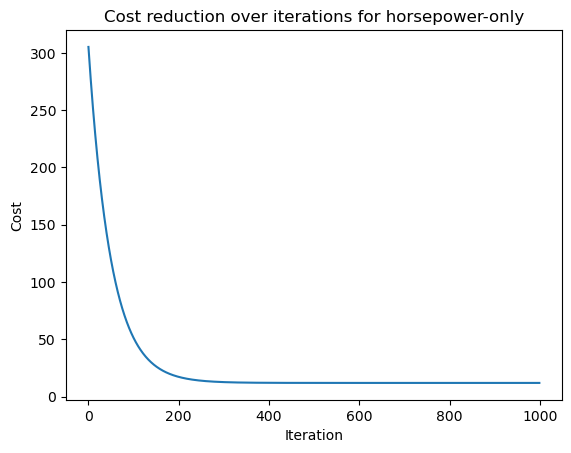

In [3]:
# Load and preprocess data for horsepower-only
X_hp, Y_hp = load_and_preprocess_data("Auto.csv")
X_hp = X_hp[:, 2].reshape(-1, 1)  # Selecting only the 'horsepower' feature

# Train the linear model with horsepower-only
w_hp, b_hp, costs_hp = train_linear_model(X_hp, Y_hp, n_iterations, learning_rate)

# Predict the output for test data
y_pred_hp = predict(X_hp, w_hp, b_hp)

# Evaluate the horsepower-only model
rmse_hp = np.sqrt(mean_squared_error(Y_hp, y_pred_hp))
r2_hp = r2_score(Y_hp, y_pred_hp)

print("Evaluation for the horsepower-only model:")
print(f"RMSE: {rmse_hp:.4f}")
print(f"R²: {r2_hp:.4f}")

# Plotting cost reduction over iterations for the horsepower-only model
plt.plot(costs_hp)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations for horsepower-only')
plt.show()


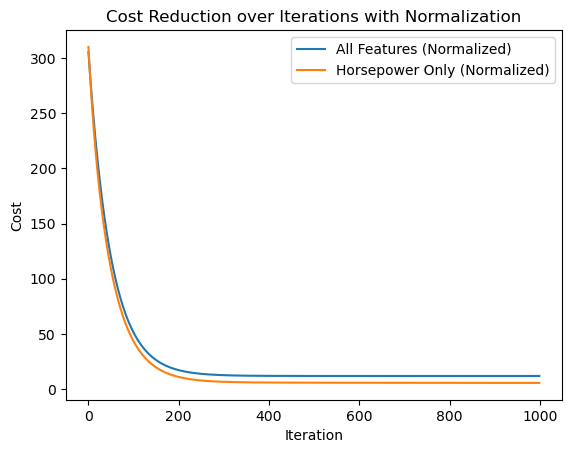

In [4]:
# Plotting cost reduction over iterations for both models with normalization
plt.plot(costs_hp, label='All Features (Normalized)')
plt.plot(costs_all, label='Horsepower Only (Normalized)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations with Normalization')
plt.legend()
plt.show()

# Without normalizing the input

Iteration 0: Cost 305.2369
Iteration 100: Cost nan
Iteration 200: Cost nan
Iteration 300: Cost nan
Iteration 400: Cost nan
Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan
Iteration 0: Cost 305.2369
Iteration 100: Cost inf
Iteration 200: Cost nan
Iteration 300: Cost nan
Iteration 400: Cost nan
Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan


C:\Users\HP\AppData\Local\Temp\ipykernel_4016\639976379.py:28: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n_samples)) * np.sum((Y - z)**2)
C:\Users\HP\AppData\Local\Temp\ipykernel_4016\639976379.py:39: RuntimeWarning: invalid value encountered in subtract
  w -= learning_rate * dw
C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


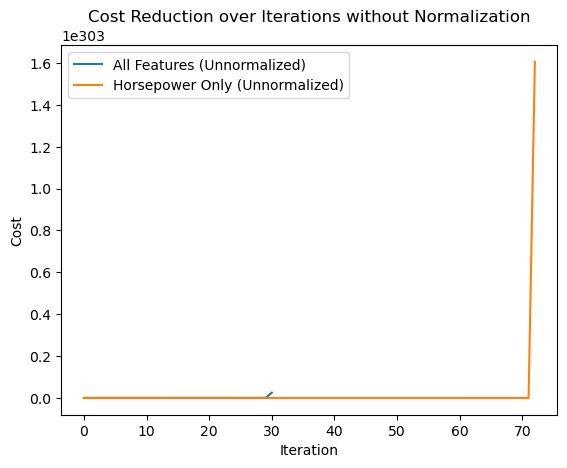

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess_data(filepath):
    # Load dataset and drop rows with NA values
    Auto = pd.read_csv(filepath, na_values='?', dtype={'ID': str}).dropna().reset_index()

    # Extract relevant data features for X, and the target variable for Y
    X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values
    Y = Auto[['mpg']].values

    return X, Y

# Define other functions needed for the linear regression model
def initialize_parameters(n_features):
    w = np.zeros((n_features, 1))
    b = 0
    return w, b

def model_forward(X, w, b):
    z = np.dot(X, w) + b
    return z

def compute_cost(Y, z):
    n_samples = len(Y)
    cost = (1/(2*n_samples)) * np.sum((Y - z)**2)
    return cost

def model_backward(X, Y, z):
    n_samples = len(Y)
    dz = (1/n_samples) * (z - Y)
    dw = np.dot(X.T, dz)
    db = np.sum(dz)
    return dw, db

def update_parameters(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

def predict(X, w, b):
    return model_forward(X, w, b)

def train_linear_model(X_train, Y_train, n_iterations, learning_rate):
    n_features = X_train.shape[1]
    w, b = initialize_parameters(n_features)
    costs = []

    for i in range(n_iterations):
        # Forward propagation
        z = model_forward(X_train, w, b)
        
        # Compute cost
        cost = compute_cost(Y_train, z)
        costs.append(cost)
        
        # Backward propagation
        dw, db = model_backward(X_train, Y_train, z)
        
        # Update parameters
        w, b = update_parameters(w, b, dw, db, learning_rate)
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b, costs

# Load and preprocess data
X, Y = load_and_preprocess_data("Auto.csv")
# Separate data for horsepower-only model
X_hp = X[:, 2].reshape(-1, 1)  # Selecting only the 'horsepower' feature

# Define training parameters
n_iterations = 1000
learning_rate = 0.01

# Train the linear model with all features without normalization
w_all_unnormalized, b_all_unnormalized, costs_all_unnormalized = train_linear_model(X, Y, n_iterations, learning_rate)
# Train the linear model with horsepower-only without normalization
w_hp_unnormalized, b_hp_unnormalized, costs_hp_unnormalized = train_linear_model(X_hp, Y, n_iterations, learning_rate)# Scatter plot for horsepower vs mpg with linear regression line for horsepower-only model without normalization


# Plotting cost reduction over iterations for both models without normalization
plt.plot(costs_all_unnormalized, label='All Features (Unnormalized)')
plt.plot(costs_hp_unnormalized, label='Horsepower Only (Unnormalized)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations without Normalization')
plt.legend()
plt.show()



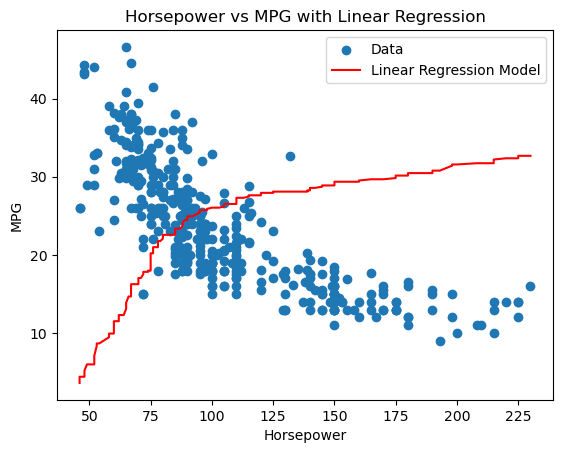

In [6]:
# Scatter plot for horsepower vs mpg with linear regression line
plt.scatter(X_hp, Y, label='Data')
plt.plot(np.sort(X_hp, axis=0), np.sort(y_pred_hp, axis=0), color='red', label='Linear Regression Model')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG with Linear Regression')
plt.legend()
plt.show()
